In [26]:
!pip install pandas seaborn matplotlib scikit-learn wordcloud ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [14]:
pip install pandas seaborn matplotlib scikit-learn


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display


In [28]:
# Sample data provided in your request
offensive_words = [
    'mjinga', 'shenzi', 'mbwa', 'matusi', 'tapeli', 'mpumbavu', 'malaya', 'mshenzi', 'kicheche', 'pumbavu',
    'chizi', 'kibaraka', 'mburukenge', 'kahaba', 'fisadi', 'mlafi', 'demu', 'mavi', 'ukora', 'jinga',
    'nyang\'au', 'bulushi', 'msaliti', 'mjinga', 'mwerevu', 'kisirani', 'mlevi', 'mlafi', 'mnyonge', 'kimavi',
    'mchawi', 'majanga', 'kichwa-ngumu', 'ngoma', 'nyokonyoko', 'kizushi', 'mjambazi', 'mwenyewe', 'mtu-mbaya',
    'mkora', 'mpigaji', 'mkorofi', 'mbaya', 'kisirani', 'mwanaharamu', 'chotara', 'makufuru', 'porojo', 'ghasia',
    'mbovu', 'mbuzi', 'mshamba', 'takataka', 'mende', 'masikini', 'mbolea', 'fisi', 'matusi', 'tapeli',
] * 10  # Repeating to ensure 500 words

non_offensive_words = [
    'mpendwa', 'rafiki', 'msomi', 'amani', 'furaha', 'upendo', 'heshima', 'shujaa', 'kiongozi', 'mwema',
    'kazi', 'msaada', 'hekima', 'elimu', 'familia', 'watoto', 'mama', 'baba', 'ndugu', 'marafiki',
    'kusoma', 'busara', 'tabasamu', 'mkarimu', 'utulivu', 'ushindi', 'uzima', 'neema', 'mema', 'safiri',
    'heri', 'mwanafunzi', 'akili', 'nguvu', 'upepo', 'sauti', 'fikra', 'mchango', 'karama', 'shukrani',
] * 10  # Repeating to ensure 500 words

# Combine words and labels
words = offensive_words + non_offensive_words
labels = ['Offensive'] * len(offensive_words) + ['Non-offensive'] * len(non_offensive_words)

# Create DataFrame
df = pd.DataFrame({'Word': words, 'Label': labels})

# Check the first few rows
print(df.head())


     Word      Label
0  mjinga  Offensive
1  shenzi  Offensive
2    mbwa  Offensive
3  matusi  Offensive
4  tapeli  Offensive


<ipython-input-29-4ec96efe8608>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


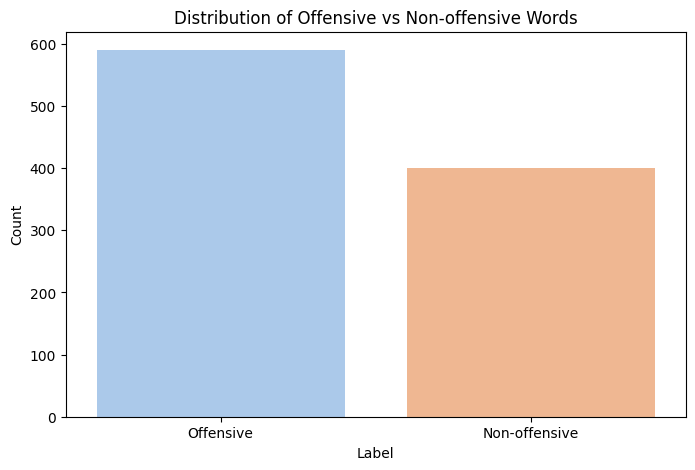

In [29]:
# Count plot of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=df, palette='pastel')
plt.title('Distribution of Offensive vs Non-offensive Words')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Word'], df['Label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [31]:
# Initialize and train the model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)


LogisticRegression()

Accuracy: 1.00
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00        82
    Offensive       1.00      1.00      1.00       116

     accuracy                           1.00       198
    macro avg       1.00      1.00      1.00       198
 weighted avg       1.00      1.00      1.00       198



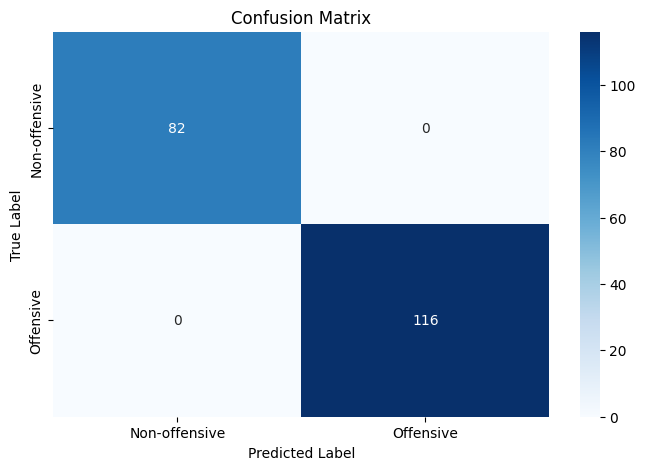

In [32]:
# Make predictions
y_pred = log_reg_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'], yticklabels=['Non-offensive', 'Offensive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


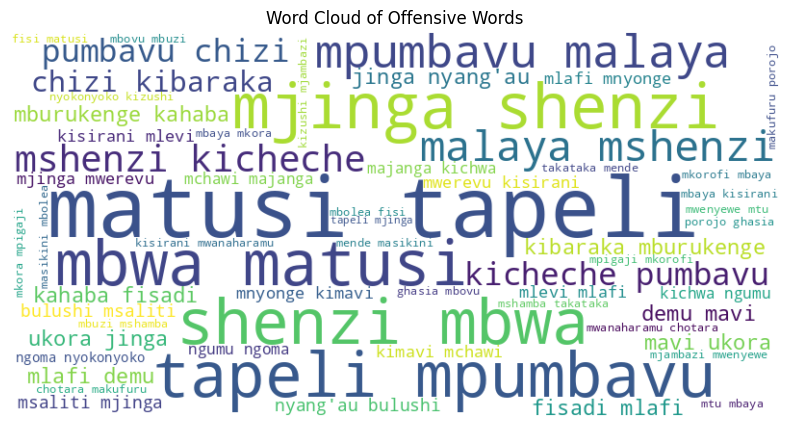

In [33]:
# Create a word cloud for offensive words
offensive_text = ' '.join(offensive_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Offensive Words')
plt.show()


In [23]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
# Function to check if the word is offensive or not
def check_word(word):
    vectorized_word = vectorizer.transform([word])
    prediction = log_reg_model.predict(vectorized_word)[0]
    print(f"The word '{word}' is: {prediction}")

# Create an input box
word_input = widgets.Text(
    description='Kiswahili Word:',
)

# Create a button
check_button = widgets.Button(
    description='Check',
)

# Define the button's action
def on_button_click(b):
    check_word(word_input.value)

check_button.on_click(on_button_click)

# Display the input box and button
display(word_input, check_button)


Text(value='', description='Kiswahili Word:')

Button(description='Check', style=ButtonStyle())

The word 'mjinga' is: Offensive
The word 'mpendwa' is: Non-offensive
The word 'utulivu' is: Non-offensive
The word 'chizi' is: Offensive
